In [4]:
# -------------------------------
# Cell 1 — Imports and Path Setup (Corrected for your system)
# -------------------------------
import pandas as pd
import joblib
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

# ✅ Correct base directory for your project
BASE_DIR = Path(r"C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main")

# Define subfolders inside the project
DATA_DIR  = BASE_DIR / "outputs" / "preprocessed"
MODEL_DIR = BASE_DIR / "outputs" / "models"
EVAL_DIR  = BASE_DIR / "outputs" / "evaluation"

# Create evaluation folder if it doesn’t exist
EVAL_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Directories configured successfully!")
print("Data directory: ", DATA_DIR)
print("Model directory:", MODEL_DIR)
print("Eval directory: ", EVAL_DIR)


✅ Directories configured successfully!
Data directory:  C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\preprocessed
Model directory: C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\models
Eval directory:  C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\evaluation


In [5]:
# -------------------------------
# Cell 2 — Load Test Data & Model
# -------------------------------
# Load preprocessed test data
X_test = pd.read_pickle(DATA_DIR / "X_test.pkl")
y_test = pd.read_pickle(DATA_DIR / "y_test.pkl")

print("✅ Test data loaded successfully!")
print("Test shape:", X_test.shape)

# Load trained Logistic Regression model
model_path = MODEL_DIR / "logistic_pipeline.joblib"
model = joblib.load(model_path)
print("✅ Loaded Logistic Regression model from:", model_path)


✅ Test data loaded successfully!
Test shape: (417, 14)
✅ Loaded Logistic Regression model from: C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\models\logistic_pipeline.joblib


In [6]:
# -------------------------------
# Cell 3 — Generate Predictions
# -------------------------------
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities (for ROC/AUC)
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
else:
    y_proba = None

# Combine actual & predicted into DataFrame
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print("✅ Predictions generated!")
comparison_df.head(15)


✅ Predictions generated!


,Actual,Predicted
0,0,1
1,1,1
2,0,1
3,1,1
4,1,1
5,1,0
6,0,0
7,1,1
8,1,1
9,1,1


In [7]:
# -------------------------------
# Cell 4 — Evaluation Metrics
# -------------------------------
print("📊 Evaluation Metrics:\n")

print("Accuracy :",  accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

if y_proba is not None:
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


📊 Evaluation Metrics:

Accuracy : 0.7937649880095923
Precision: 0.7675438596491229
Recall   : 0.8413461538461539
F1 Score : 0.8027522935779816
ROC-AUC  : 0.867891976444608

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.75      0.78       209
           1       0.77      0.84      0.80       208

    accuracy                           0.79       417
   macro avg       0.80      0.79      0.79       417
weighted avg       0.80      0.79      0.79       417



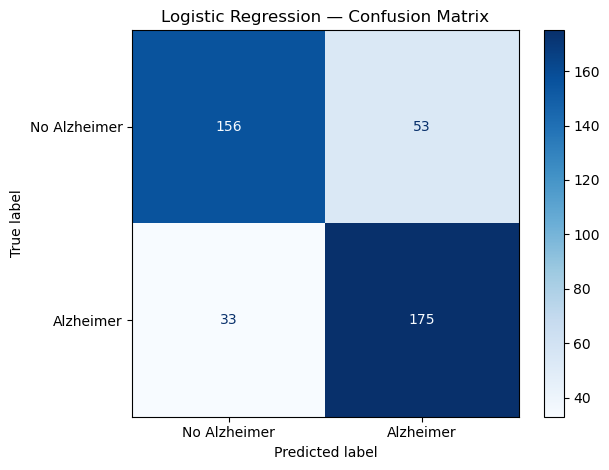

✅ Confusion matrix saved to: C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\evaluation


In [8]:
# -------------------------------
# Cell 5 — Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Alzheimer', 'Alzheimer'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression — Confusion Matrix')
plt.tight_layout()

# Save confusion matrix image (optional)
plt.savefig(EVAL_DIR / "logistic_regression_confusion_matrix.png", dpi=200)
plt.show()

print("✅ Confusion matrix saved to:", EVAL_DIR)


In [10]:
# -------------------------------
# Cell 7 — Save Predictions and Metrics
# -------------------------------
# Save comparison DataFrame
comparison_path = EVAL_DIR / "logistic_regression_predictions.csv"
comparison_df.to_csv(comparison_path, index=False)
print(f"✅ Saved prediction comparison to: {comparison_path}")

# Compute & save metrics summary
metrics_summary = {
    "Model":      ["Logistic Regression"],
    "Accuracy":   [accuracy_score(y_test, y_pred)],
    "Precision":  [precision_score(y_test, y_pred)],
    "Recall":     [recall_score(y_test, y_pred)],
    "F1_Score":   [f1_score(y_test, y_pred)]
}

if y_proba is not None:
    metrics_summary["ROC_AUC"] = [roc_auc_score(y_test, y_proba)]

metrics_df = pd.DataFrame(metrics_summary)
metrics_path = EVAL_DIR / "logistic_regression_metrics_summary.csv"
metrics_df.to_csv(metrics_path, index=False)

print(f"✅ Saved evaluation metrics to: {metrics_path}")
metrics_df


✅ Saved prediction comparison to: C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\evaluation\logistic_regression_predictions.csv
✅ Saved evaluation metrics to: C:\Users\Isha Singh\Desktop\Alzheimer-Prediction-System-main\outputs\evaluation\logistic_regression_metrics_summary.csv


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression,0.793765,0.767544,0.841346,0.802752,0.867892
